In [5]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Confirm we are in the correct folder
print("Current folder:", os.getcwd())

# Load dataset
sales_df = pd.read_csv("supermarketsales.csv")

# Show size of dataset
print("Shape:", sales_df.shape)

# Show first 5 rows
sales_df.head()

Current folder: C:\Users\rdots\Documents\AnalyticsProjects\SalesAnalysis
Shape: (1000, 17)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
# Inspect Columns

sales_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='str')

In [8]:
query = """
    SELECT 
        Branch,
        SUM(Total) AS Total_Sales,
        COUNT("Invoice ID") AS Transactions,
        SUM(Quantity) AS Total_Items_Sold
    FROM sales_df
    GROUP BY Branch
    ORDER BY Total_Sales DESC
"""

summary_df = duckdb.query(query).df()

summary_df

,Branch,Total_Sales,Transactions,Total_Items_Sold
0,C,110568.7065,328,1831.0
1,A,106200.3705,340,1859.0
2,B,106197.6720,332,1820.0


In [9]:
summary_df.to_csv("sales_summary.csv", index=False)

In [10]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'README.md',
 'sales_analysis.ipynb',
 'sales_summary.csv',
 'supermarketsales.csv']

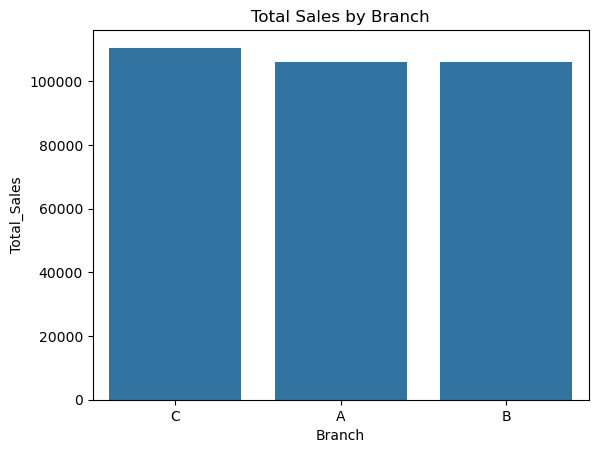

In [11]:
sns.barplot(data=summary_df, x="Branch", y="Total_Sales")
plt.title("Total Sales by Branch")
plt.show()